<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/speed.png?raw=true" width=800 align="left"/>

# 실습 내용

- Cars 데이터를 불러와 살펴봅니다.
- 단순 선형회귀 모델을 만들고 평가합니다.
- 특히 회귀 계수를 명확히 이해합니다.
- 예측 결과를 시각화합니다.

* speed 로 제동거리 예측

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/cars.csv'
path = 'https://bit.ly/CarsFile'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [4]:
# 상위 몇 개 행 확인
data.head()


,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


* speed 단위는 mile
* dist 단위는 feet

In [5]:
# 하위 몇 개 행 확인
data.tail()

,speed,dist
45,24,70
46,24,92
47,24,93
48,24,120
49,25,85


In [6]:
# 기술통계 확인
data.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


In [9]:
# NaN 값 확인
data.isnull().sum()

speed    0
dist     0
dtype: int64

In [11]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single

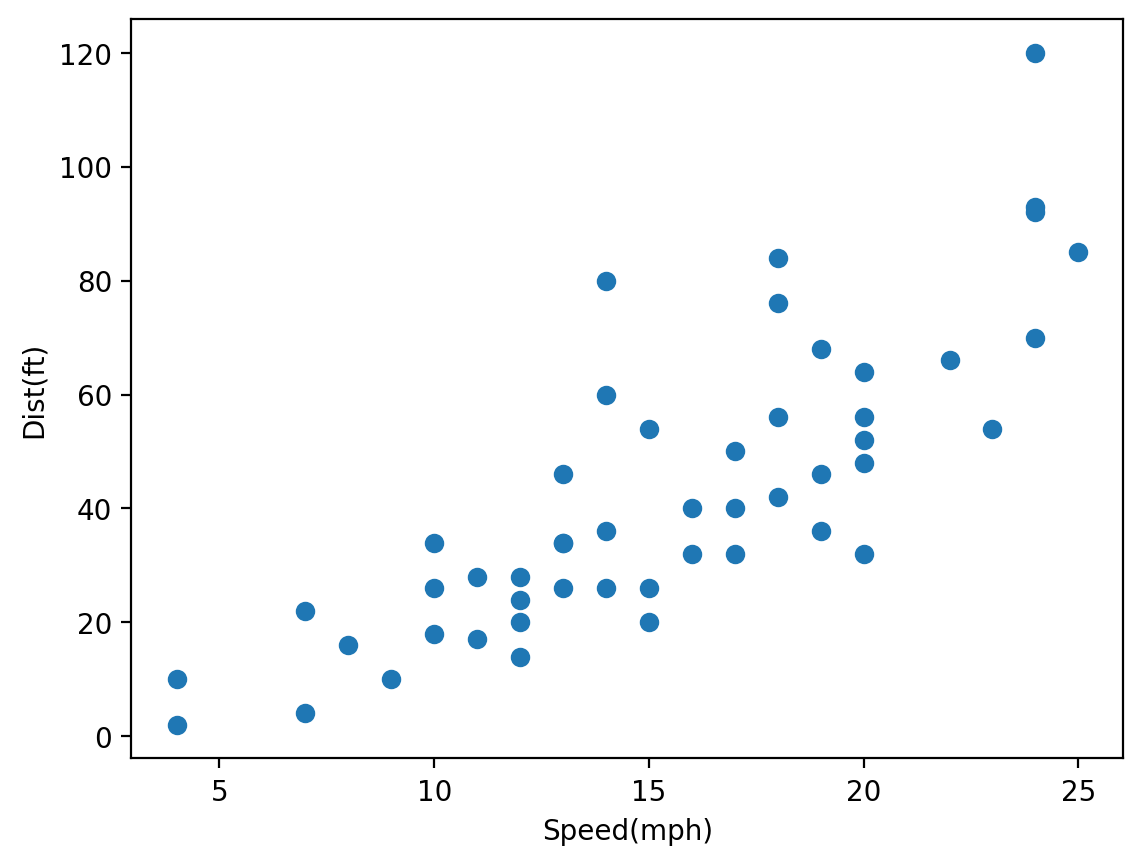

In [10]:
# speed, dist 관계
plt.scatter(x='speed', y='dist', data=data)
plt.xlabel('Speed(mph)')
plt.ylabel('Dist(ft)')
plt.show()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

- 우선 target 변수를 명확히 지정합니다.
- target을 제외한 나머지 변수들 데이터는 x로 선언합니다.
- target 변수 데이터는 y로 선언합니다. 
- 이 결과로 만들어진 x는 데이터프레임, y는 시리즈가 됩니다.
- 이후 모든 작업은 x, y를 대상으로 진행합니다.

In [12]:
# target 확인
target = 'dist'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**2) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [13]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

In [15]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


In [16]:
# 2단계: 선언하기
model = LinearRegression()

In [17]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [18]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [19]:
# 5단계: 평가하기
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('r2 : ', r2_score(y_test, y_pred))

# 15 ft 정도의 평균 오차가 존재하고
# 평균 제동거리보다 55% 더 나은 설명력을 가진다.

MAE :  15.113442990354987
r2 :  0.5548332681132087


- 회귀 계수를 살펴봅니다.

In [20]:
# 회귀계수 확인
print('가중치 : ',model.coef_)
print('편향 : ', model.intercept_)

가중치 :  [3.91046344]
편향 :  -16.373364149357656


$$\Large Distance = -16.37 + 3.91*Speed $$

# 5.기타

- 기타 필요한 내용이 있으면 진행합니다.

In [24]:
np.linspace(7.5,25,10)

array([ 7.5       ,  9.44444444, 11.38888889, 13.33333333, 15.27777778,
       17.22222222, 19.16666667, 21.11111111, 23.05555556, 25.        ])

In [25]:
# 회귀식 만들기
# y = ax + b
a = model.coef_
b = model.intercept_

bins = 10
speed = np.linspace(x_test.min(),x_test.max(), bins)
dist = a*speed + b

In [42]:
help(plt.axhline)

Help on function axhline in module matplotlib.pyplot:

axhline(y=0, xmin=0, xmax=1, **kwargs)
    Add a horizontal line across the Axes.
    
    Parameters
    ----------
    y : float, default: 0
        y position in data coordinates of the horizontal line.
    
    xmin : float, default: 0
        Should be between 0 and 1, 0 being the far left of the plot, 1 the
        far right of the plot.
    
    xmax : float, default: 1
        Should be between 0 and 1, 0 being the far left of the plot, 1 the
        far right of the plot.
    
    Returns
    -------
    `~matplotlib.lines.Line2D`
    
    Other Parameters
    ----------------
    **kwargs
        Valid keyword arguments are `.Line2D` properties, except for
        'transform':
    
        Properties:
        agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
        alpha: scalar or None
        animate

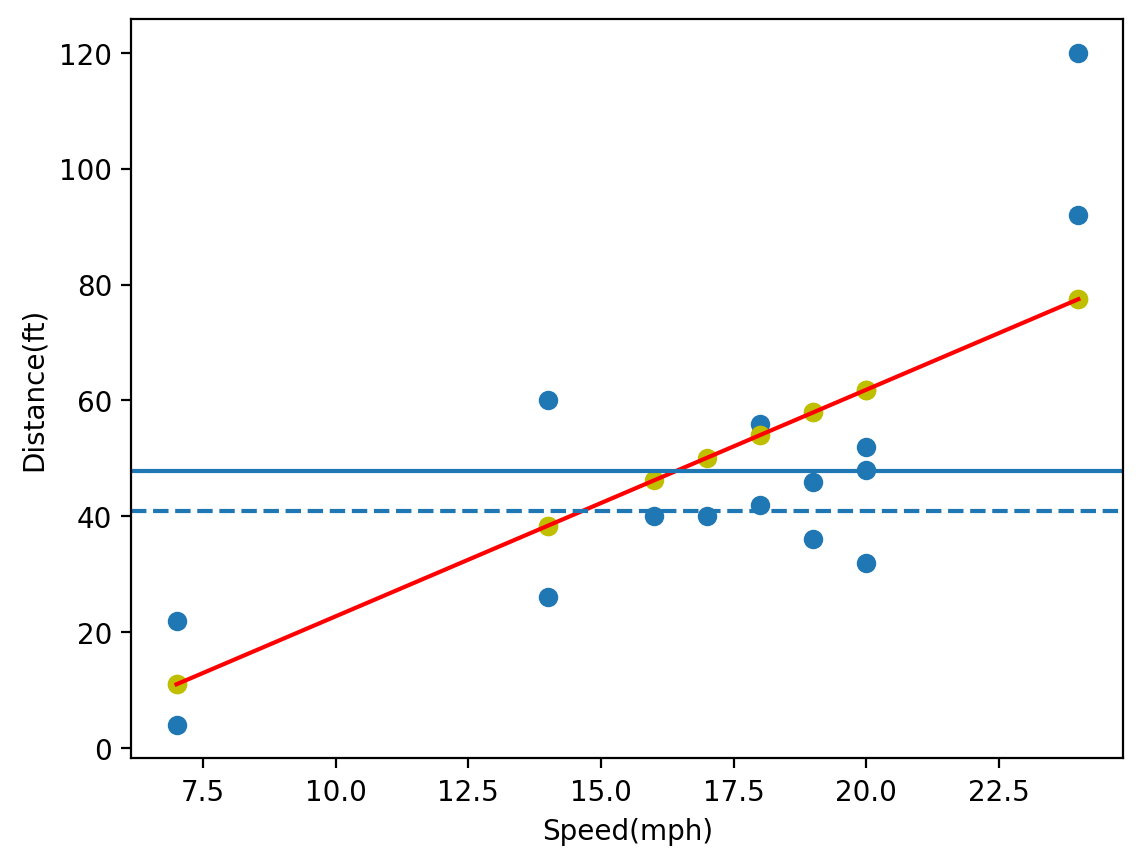

In [43]:
plt.scatter(x_test, y_test) # 평가데이터
# plt.scatter(x_train, y_train) # 학습데이터
plt.scatter(x_test, y_pred, color='y') # 예측데이터, 회귀선 위에 찍힌다.
plt.plot(speed, dist, color ='r') # 학습데이터에 대한 최선의 회귀선이다. 평가데이터 ㄴㄴ
plt.axhline(y_test.mean()) # r2 score는 평가데이터의 평균을 기준으로 계산되기에 y_test 평균으로 긋는다
plt.axhline(y_train.mean(), linestyle='--') # 하지만, 훈련데이터 평균도 의미가있다. 

plt.xlabel('Speed(mph)')
plt.ylabel('Distance(ft)')
plt.show()

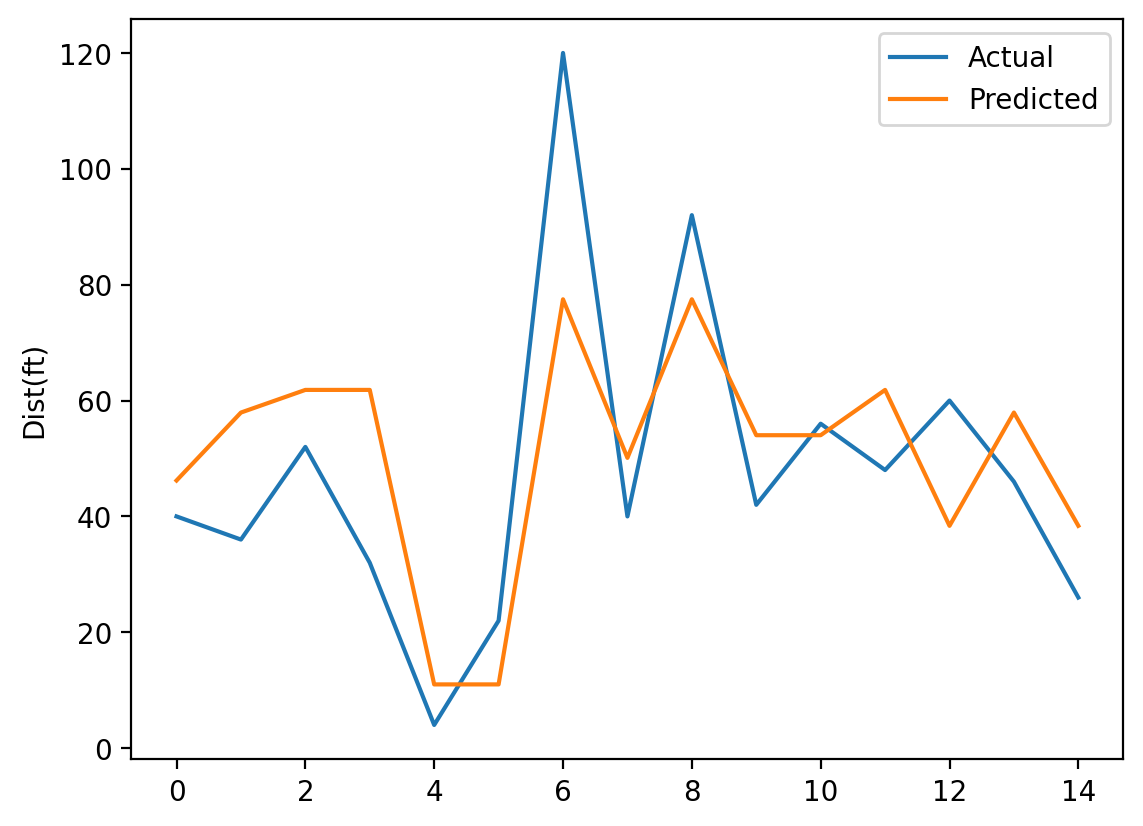

In [44]:
# 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.ylabel('Dist(ft)')
plt.show()